# Part I. Setup - Data Cleaning and Preparation

## Background

This was my first attempt at EDA. I originally used a dataset of daily Trending Youtube videos. However, after very initial EDA, I realized that my performance indicators such as views, likes and comments may be skewed by nature of this dataset being trending / popular. I have decided to move on to a new dataset, but this is the original EDA attempt.

In [1]:
import numpy as np
import pandas as pd

# plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

# stats
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm

## Steps

1. Read in Trending data
    - Look at summary statistics
    
2. Gather categories from JSON file

3. Perform EDA
    - Look at histogram of numeric and categorical columns

In [2]:
data = pd.read_csv("US_youtube_trending_data_08212024.csv")

In [3]:
data.shape

(268787, 16)

In [4]:
data.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [5]:
data.tail()

#data up til 4/24

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
268782,4-uXvx5M7XA,Total solar eclipse causing tourism boost acro...,2024-04-08T15:55:44Z,UClwddNv0Cr6SIEGkzVK886w,FOX 9 Minneapolis-St. Paul,25,2024-04-15T00:00:00Z,morning-news|Eclipses|travel|travel news|weath...,359130,2345,0,581,https://i.ytimg.com/vi/4-uXvx5M7XA/default.jpg,False,False,Millions of people in the United States are tr...
268783,aFsfJYWpqII,Food Delivery Apps: Last Week Tonight with Joh...,2024-04-04T11:00:02Z,UC3XTzVzaHQEd30rQbuvCtTQ,LastWeekTonight,24,2024-04-15T00:00:00Z,[None],3998181,107811,0,10335,https://i.ytimg.com/vi/aFsfJYWpqII/default.jpg,False,False,"John Oliver discusses food delivery apps, how ..."
268784,pRAsQss17xs,12 Things NO-ONE Tells You About Japan | Feat....,2024-04-07T14:53:25Z,UCHL9bfHTxCMi-7vfxQ-AYtg,Abroad in Japan,24,2024-04-15T00:00:00Z,japan|cdawgva|abroad in japan|trash taste,873960,41941,0,1918,https://i.ytimg.com/vi/pRAsQss17xs/default.jpg,False,False,We reveal 12 things no-one tells you to expect...
268785,84QeCD7y_Ds,Buying My Dream Car At 21,2024-04-07T18:00:03Z,UChQ-d14tHB62nskossxO0tw,Joe Fazer,24,2024-04-15T00:00:00Z,gym|youtube|bodybuilder|powerlifter|vlog|vlogg...,535842,42845,0,1852,https://i.ytimg.com/vi/84QeCD7y_Ds/default.jpg,False,False,Use code JOE at checkout to get discounts on M...
268786,SBTA3Tegacs,Murder Drones Training Video,2024-04-05T19:00:12Z,UCn_FAXem2-e3HQvmK-mOH4g,GLITCH,1,2024-04-15T00:00:00Z,meta runner|glitch productions|funny|video gam...,3073412,246678,0,14535,https://i.ytimg.com/vi/SBTA3Tegacs/default.jpg,False,False,J IS FINALLY A PLUSH and NEW Corporate Murder ...


In [6]:
data.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,268787.000000,2.687870e+05,2.687870e+05,268787.000000,2.687870e+05
mean,18.743511,2.734467e+06,1.314697e+05,1134.277495,1.014303e+04
std,6.786562,9.794087e+06,4.539469e+05,8047.291315,7.260853e+04
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,17.000000,4.725410e+05,1.796300e+04,0.000000,1.280000e+03
50%,20.000000,9.368710e+05,4.020500e+04,0.000000,2.754000e+03
75%,24.000000,2.106178e+06,9.877300e+04,467.000000,6.386000e+03
max,29.000000,1.407644e+09,1.602153e+07,879354.000000,6.738537e+06


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268787 entries, 0 to 268786
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           268787 non-null  object
 1   title              268787 non-null  object
 2   publishedAt        268787 non-null  object
 3   channelId          268787 non-null  object
 4   channelTitle       268787 non-null  object
 5   categoryId         268787 non-null  int64 
 6   trending_date      268787 non-null  object
 7   tags               268787 non-null  object
 8   view_count         268787 non-null  int64 
 9   likes              268787 non-null  int64 
 10  dislikes           268787 non-null  int64 
 11  comment_count      268787 non-null  int64 
 12  thumbnail_link     268787 non-null  object
 13  comments_disabled  268787 non-null  bool  
 14  ratings_disabled   268787 non-null  bool  
 15  description        264238 non-null  object
dtypes: bool(2), int64(5)

In [8]:
#thoughts

#remove comments disabled = True
#maybe see if they were disabled after?

#ratings disabled = True

#empty description? 4k so just remove

In [9]:
#reading in category
category = pd.read_json("US_category_id.json")

In [10]:
category

,kind,etag,items
0,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': 'IfW..."
1,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': '5XG..."
2,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': 'HCj..."
3,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': 'ra8..."
4,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': '7mq..."
5,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': '0Z6..."
6,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': 'K_-..."
7,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': 'I3I..."
8,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': 'D1W..."
9,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': 'QME..."


In [11]:
pd.json_normalize(category['items'])

,kind,etag,id,snippet.title,snippet.assignable,snippet.channelId
0,youtube#videoCategory,IfWa37JGcqZs-jZeAyFGkbeh6bc,1,Film & Animation,True,UCBR8-60-B28hp2BmDPdntcQ
1,youtube#videoCategory,5XGylIs7zkjHh5940dsT5862m1Y,2,Autos & Vehicles,True,UCBR8-60-B28hp2BmDPdntcQ
2,youtube#videoCategory,HCjFMARbBeWjpm6PDfReCOMOZGA,10,Music,True,UCBR8-60-B28hp2BmDPdntcQ
3,youtube#videoCategory,ra8H7xyAfmE2FewsDabE3TUSq10,15,Pets & Animals,True,UCBR8-60-B28hp2BmDPdntcQ
4,youtube#videoCategory,7mqChSJogdF3hSIL-88BfDE-W8M,17,Sports,True,UCBR8-60-B28hp2BmDPdntcQ
5,youtube#videoCategory,0Z6uGkj97NgjD-X3pkA-nL18Hqk,18,Short Movies,False,UCBR8-60-B28hp2BmDPdntcQ
6,youtube#videoCategory,K_-7stg0kIU7eUBOPUa6j5fqIMQ,19,Travel & Events,True,UCBR8-60-B28hp2BmDPdntcQ
7,youtube#videoCategory,I3IL9xGIM3MsULlqR4tvCsEKv98,20,Gaming,True,UCBR8-60-B28hp2BmDPdntcQ
8,youtube#videoCategory,D1W6tq5mMMCV0wtNxf9A6g9wWjU,21,Videoblogging,False,UCBR8-60-B28hp2BmDPdntcQ
9,youtube#videoCategory,QMEBz6mxVdklVaq8JwesPEw_4nI,22,People & Blogs,True,UCBR8-60-B28hp2BmDPdntcQ


In [12]:
#getting category id and cateogry title from json file
category_table = pd.json_normalize(category['items'])[['id','snippet.title']]
category_table

,id,snippet.title
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [13]:
category_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             32 non-null     object
 1   snippet.title  32 non-null     object
dtypes: object(2)
memory usage: 640.0+ bytes


In [14]:
category_table['id'] = category_table['id'].astype('int64')

In [15]:
#merge data with category
#create new table
#drop id column

df = pd.merge(data,category_table,how='left',left_on='categoryId', right_on='id').drop(columns=['id'])
df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,snippet.title
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",Gaming
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,Entertainment
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,Music
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,Howto & Style
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268782,4-uXvx5M7XA,Total solar eclipse causing tourism boost acro...,2024-04-08T15:55:44Z,UClwddNv0Cr6SIEGkzVK886w,FOX 9 Minneapolis-St. Paul,25,2024-04-15T00:00:00Z,morning-news|Eclipses|travel|travel news|weath...,359130,2345,0,581,https://i.ytimg.com/vi/4-uXvx5M7XA/default.jpg,False,False,Millions of people in the United States are tr...,News & Politics
268783,aFsfJYWpqII,Food Delivery Apps: Last Week Tonight with Joh...,2024-04-04T11:00:02Z,UC3XTzVzaHQEd30rQbuvCtTQ,LastWeekTonight,24,2024-04-15T00:00:00Z,[None],3998181,107811,0,10335,https://i.ytimg.com/vi/aFsfJYWpqII/default.jpg,False,False,"John Oliver discusses food delivery apps, how ...",Entertainment
268784,pRAsQss17xs,12 Things NO-ONE Tells You About Japan | Feat....,2024-04-07T14:53:25Z,UCHL9bfHTxCMi-7vfxQ-AYtg,Abroad in Japan,24,2024-04-15T00:00:00Z,japan|cdawgva|abroad in japan|trash taste,873960,41941,0,1918,https://i.ytimg.com/vi/pRAsQss17xs/default.jpg,False,False,We reveal 12 things no-one tells you to expect...,Entertainment
268785,84QeCD7y_Ds,Buying My Dream Car At 21,2024-04-07T18:00:03Z,UChQ-d14tHB62nskossxO0tw,Joe Fazer,24,2024-04-15T00:00:00Z,gym|youtube|bodybuilder|powerlifter|vlog|vlogg...,535842,42845,0,1852,https://i.ytimg.com/vi/84QeCD7y_Ds/default.jpg,False,False,Use code JOE at checkout to get discounts on M...,Entertainment


In [16]:
#want to rename
df.rename(columns={'snippet.title': 'category'}, inplace=True)
df

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,category
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",Gaming
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,Entertainment
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,Music
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,Howto & Style
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268782,4-uXvx5M7XA,Total solar eclipse causing tourism boost acro...,2024-04-08T15:55:44Z,UClwddNv0Cr6SIEGkzVK886w,FOX 9 Minneapolis-St. Paul,25,2024-04-15T00:00:00Z,morning-news|Eclipses|travel|travel news|weath...,359130,2345,0,581,https://i.ytimg.com/vi/4-uXvx5M7XA/default.jpg,False,False,Millions of people in the United States are tr...,News & Politics
268783,aFsfJYWpqII,Food Delivery Apps: Last Week Tonight with Joh...,2024-04-04T11:00:02Z,UC3XTzVzaHQEd30rQbuvCtTQ,LastWeekTonight,24,2024-04-15T00:00:00Z,[None],3998181,107811,0,10335,https://i.ytimg.com/vi/aFsfJYWpqII/default.jpg,False,False,"John Oliver discusses food delivery apps, how ...",Entertainment
268784,pRAsQss17xs,12 Things NO-ONE Tells You About Japan | Feat....,2024-04-07T14:53:25Z,UCHL9bfHTxCMi-7vfxQ-AYtg,Abroad in Japan,24,2024-04-15T00:00:00Z,japan|cdawgva|abroad in japan|trash taste,873960,41941,0,1918,https://i.ytimg.com/vi/pRAsQss17xs/default.jpg,False,False,We reveal 12 things no-one tells you to expect...,Entertainment
268785,84QeCD7y_Ds,Buying My Dream Car At 21,2024-04-07T18:00:03Z,UChQ-d14tHB62nskossxO0tw,Joe Fazer,24,2024-04-15T00:00:00Z,gym|youtube|bodybuilder|powerlifter|vlog|vlogg...,535842,42845,0,1852,https://i.ytimg.com/vi/84QeCD7y_Ds/default.jpg,False,False,Use code JOE at checkout to get discounts on M...,Entertainment


In [17]:
#looking at data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268787 entries, 0 to 268786
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           268787 non-null  object
 1   title              268787 non-null  object
 2   publishedAt        268787 non-null  object
 3   channelId          268787 non-null  object
 4   channelTitle       268787 non-null  object
 5   categoryId         268787 non-null  int64 
 6   trending_date      268787 non-null  object
 7   tags               268787 non-null  object
 8   view_count         268787 non-null  int64 
 9   likes              268787 non-null  int64 
 10  dislikes           268787 non-null  int64 
 11  comment_count      268787 non-null  int64 
 12  thumbnail_link     268787 non-null  object
 13  comments_disabled  268787 non-null  bool  
 14  ratings_disabled   268787 non-null  bool  
 15  description        264238 non-null  object
 16  category           2

In [18]:
df.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,268787.000000,2.687870e+05,2.687870e+05,268787.000000,2.687870e+05
mean,18.743511,2.734467e+06,1.314697e+05,1134.277495,1.014303e+04
std,6.786562,9.794087e+06,4.539469e+05,8047.291315,7.260853e+04
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,17.000000,4.725410e+05,1.796300e+04,0.000000,1.280000e+03
50%,20.000000,9.368710e+05,4.020500e+04,0.000000,2.754000e+03
75%,24.000000,2.106178e+06,9.877300e+04,467.000000,6.386000e+03
max,29.000000,1.407644e+09,1.602153e+07,879354.000000,6.738537e+06


In [19]:
df.isna().sum()

video_id                0
title                   0
publishedAt             0
channelId               0
channelTitle            0
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
thumbnail_link          0
comments_disabled       0
ratings_disabled        0
description          4549
category                0
dtype: int64

## Cleaning Data

In [20]:
#removing nulls
df.dropna(subset=['description'], inplace = True)

In [27]:
df.isna().sum()

video_id             0
title                0
publishedAt          0
channelId            0
channelTitle         0
categoryId           0
trending_date        0
tags                 0
view_count           0
likes                0
dislikes             0
comment_count        0
thumbnail_link       0
comments_disabled    0
ratings_disabled     0
description          0
category             0
dtype: int64

In [22]:
#saving data to csv for EDA
df.to_csv('Trending_Videos.csv', index=False)

In [30]:
#after importing to Tableau for EDA, I want to filter for dates 1/1/2022 to 4/15/2024 to reduce the amount of records

#setting up dates
start_date = '2022-01-01'
end_date = '2024-04-15'

# filtering for dates
df_dates = df[(df['publishedAt'] >= start_date) & (df['publishedAt'] <= end_date)]

In [32]:
df_dates.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,category
102391,xxko9DfdNaY,Orange Bowl: Georgia Bulldogs vs. Michigan Wol...,2022-01-01T04:08:33Z,UCzRWWsFjqHk1an4OnVPsl9g,ESPN College Football,17,2022-01-02T00:00:00Z,[None],612167,4959,0,2604,https://i.ytimg.com/vi/xxko9DfdNaY/default.jpg,False,False,The Georgia Bulldogs defeated the Michigan Wol...,Sports
102393,xoTKv4d5yjc,Times Square 2022 Ball Drop in New York City: ...,2022-01-01T05:10:25Z,UCVaXclURQZlakiTMzuwHvRw,News 19 WLTX,25,2022-01-02T00:00:00Z,holidays|life,604094,6285,0,1292,https://i.ytimg.com/vi/xoTKv4d5yjc/default.jpg,False,False,"Though with a smaller crowd this time, confett...",News & Politics
102396,Pmlh6AHFW0E,Welcome to MOVE - A 30 Day Yoga Journey | Yo...,2022-01-01T10:00:11Z,UCFKE7WVJfvaHW5q283SxchA,Yoga With Adriene,26,2022-01-02T00:00:00Z,30 days of yoga|30 day yoga journey|move 30 da...,530168,29306,0,2247,https://i.ytimg.com/vi/Pmlh6AHFW0E/default.jpg,False,False,Join me for a group breath. Let us gather. Tod...,Howto & Style
102398,VurcwV-3zNc,Happy New Year Live! 🎆 London Fireworks 2022 🔴...,2022-01-01T00:16:48Z,UCCj956IF62FbT7Gouszaj9w,BBC,24,2022-01-02T00:00:00Z,fireworks|NYE|new year countdown 2022|firework...,2293861,32299,0,4418,https://i.ytimg.com/vi/VurcwV-3zNc/default.jpg,False,False,Subscribe and 🔔 to OFFICIAL BBC YouTube 👉 http...,Entertainment
102399,nLWukWhKxjI,Cotton Bowl: Alabama Crimson Tide vs. Cincinna...,2022-01-01T00:12:11Z,UCzRWWsFjqHk1an4OnVPsl9g,ESPN College Football,17,2022-01-02T00:00:00Z,College Football on ESPN|College Football Play...,444187,3933,0,1560,https://i.ytimg.com/vi/nLWukWhKxjI/default.jpg,False,False,The Alabama Crimson Tide defeated the Cincinna...,Sports


In [34]:
#saving filtered data to csv
df_dates.to_csv('Trending_Videos_Filtered.csv', index=False)

# EDA

In [23]:
#looking at scope of dates

In [24]:
df.trending_date.min()

'2020-08-12T00:00:00Z'

In [25]:
df.trending_date.max()

'2024-04-15T00:00:00Z'

In [28]:
df.select_dtypes("number").sum()

categoryId            4944966
view_count       719422035287
likes             34517716858
dislikes            290395088
comment_count      2706923116
dtype: int64

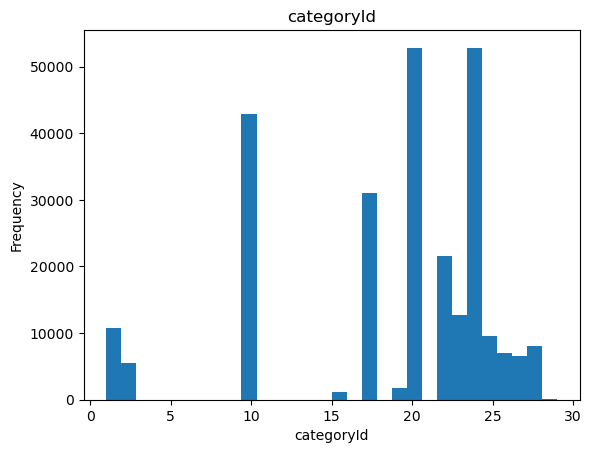

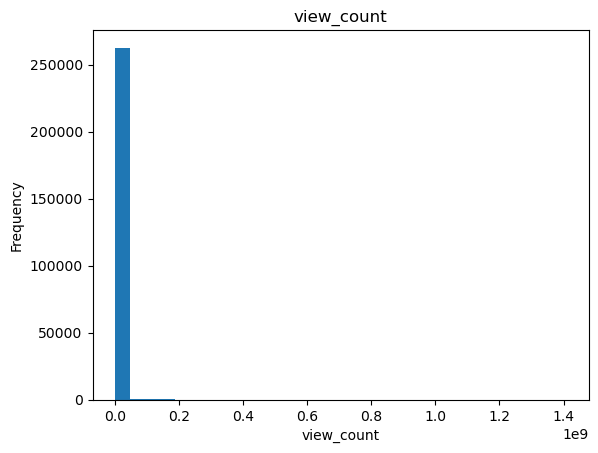

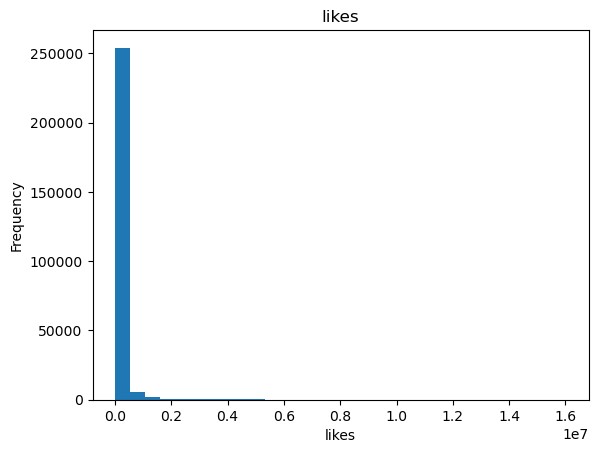

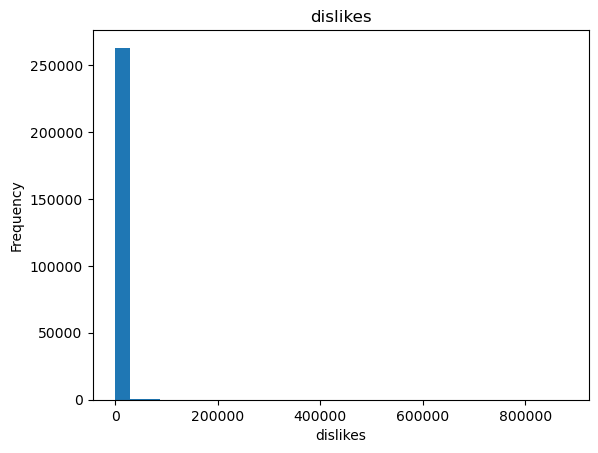

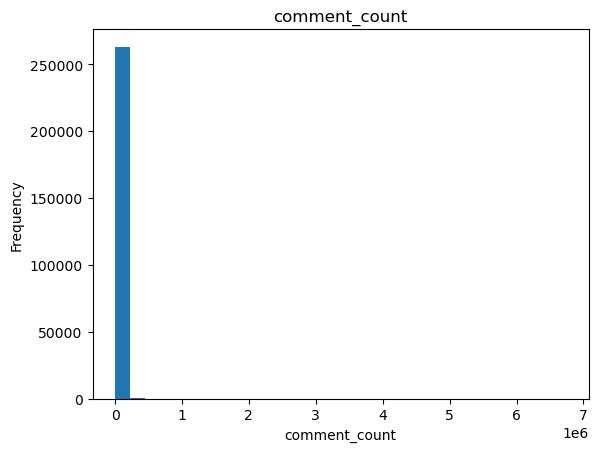

In [33]:
#creating histograms for numeric data
for col in df.select_dtypes("number"):
    plt.figure()
    plt.hist(df[col], bins=30)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(col)

Text(0.5, 1.0, 'Histogram of View Count (log scale)')

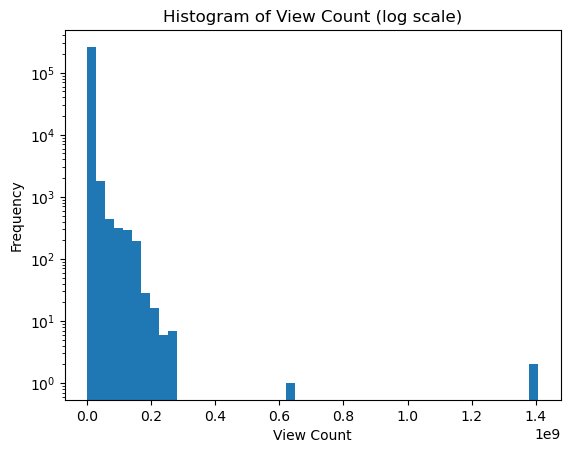

In [49]:
plt.figure()
plt.hist(df['view_count'], bins=50, log=True)
plt.xlabel('View Count')
plt.ylabel('Frequency')
plt.title('Histogram of View Count (log scale)')

<Axes: xlabel='view_count', ylabel='category'>

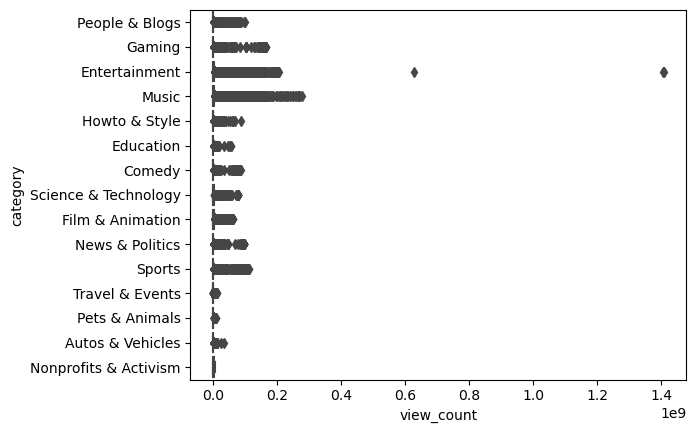

In [40]:
#boxplot by category
sns.boxplot(x='view_count',y='category',data=df)

In [44]:
#looking at summary table by category
df.groupby('category')['view_count'].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
Autos & Vehicles,5471.0,9.635753e+05,1.195739e+06,50335.0,381166.00,650313.0,1127037.5,3.570888e+07
Comedy,12676.0,1.480954e+06,3.344901e+06,72607.0,471645.25,887729.5,1640130.0,8.728410e+07
Education,6517.0,1.493529e+06,2.086549e+06,0.0,515471.00,937697.0,1809007.0,5.529919e+07
Entertainment,52798.0,4.442787e+06,1.732435e+07,0.0,533425.25,1077111.5,2662874.5,1.407644e+09
Film & Animation,10795.0,2.679987e+06,4.738763e+06,0.0,538745.00,1104793.0,2608404.5,6.381789e+07
Gaming,52842.0,1.657499e+06,4.748409e+06,51622.0,439168.50,815491.0,1723242.5,1.663234e+08
Howto & Style,7001.0,1.228849e+06,2.866569e+06,0.0,382210.00,666504.0,1301769.0,8.907598e+07
Music,42861.0,4.362544e+06,1.158320e+07,0.0,609150.00,1396418.0,3592506.0,2.777917e+08
News & Politics,9583.0,1.949845e+06,6.203285e+06,47552.0,360877.00,764953.0,1619516.5,9.820226e+07


## Results
Views, likes/dislikes, and comments may be skewed given the nature of the trending dataset.

Decision: Explore alternative dataset